In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [37]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_I7000_F6000_D3_500_I_F_PKL_Prediction.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur,Vorhergesagt
1037169,0.00000,-0.00200,500,7000,6000,811.76,804.898438
1037170,0.00000,-0.00196,500,7000,6000,853.27,847.824524
1037171,0.00000,-0.00192,500,7000,6000,897.57,892.414185
1037172,0.00000,-0.00188,500,7000,6000,941.21,938.235107
1037173,0.00000,-0.00184,500,7000,6000,986.34,986.860657
...,...,...,...,...,...,...,...
1043527,0.00248,0.00184,500,7000,6000,784.55,791.223999
1043528,0.00248,0.00188,500,7000,6000,745.87,756.596252
1043529,0.00248,0.00192,500,7000,6000,706.17,721.353638
1043530,0.00248,0.00196,500,7000,6000,693.28,685.867065


In [45]:
data['Differenz'] = data['Temperatur'] - data['Vorhergesagt']
data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur,Vorhergesagt,Differenz
1037169,0.00000,-0.00200,500,7000,6000,811.76,804.898438,6.861562
1037170,0.00000,-0.00196,500,7000,6000,853.27,847.824524,5.445476
1037171,0.00000,-0.00192,500,7000,6000,897.57,892.414185,5.155815
1037172,0.00000,-0.00188,500,7000,6000,941.21,938.235107,2.974893
1037173,0.00000,-0.00184,500,7000,6000,986.34,986.860657,-0.520657
...,...,...,...,...,...,...,...,...
1043527,0.00248,0.00184,500,7000,6000,784.55,791.223999,-6.673999
1043528,0.00248,0.00188,500,7000,6000,745.87,756.596252,-10.726252
1043529,0.00248,0.00192,500,7000,6000,706.17,721.353638,-15.183638
1043530,0.00248,0.00196,500,7000,6000,693.28,685.867065,7.412935


In [38]:
df = data.drop(data.columns[2:5], axis=1)
df['Temperatur'].describe()

count    6363.000000
mean     1507.898773
std       366.892764
min       687.800000
25%      1240.100000
50%      1612.500000
75%      1805.750000
max      1998.400000
Name: Temperatur, dtype: float64

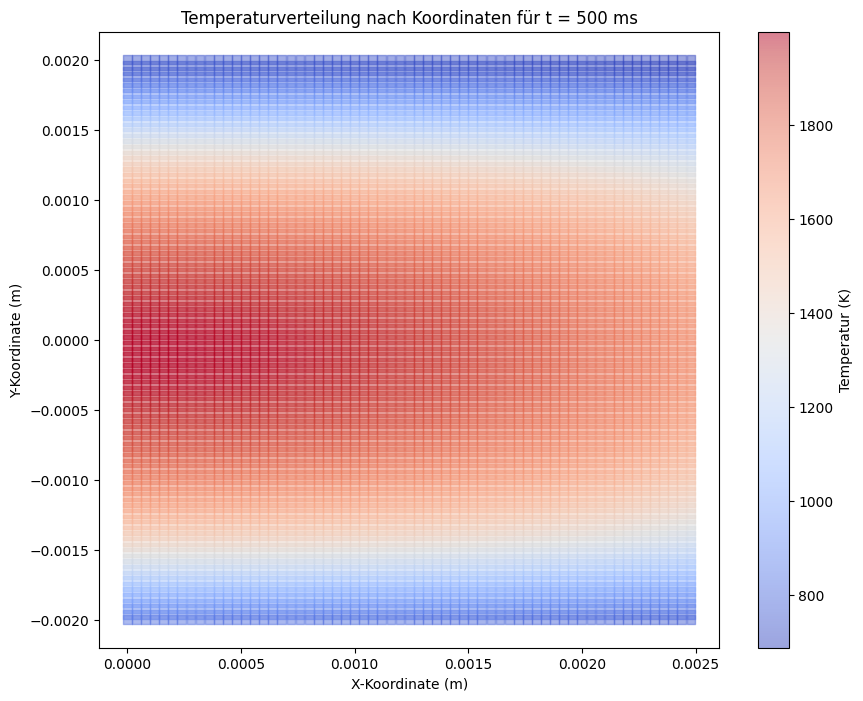

In [40]:
import matplotlib.pyplot as plt

x = df['X-Koordinate']
y = df['Y-Koordinate']  # Y-Koordinaten
temperature = df['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', alpha=0.5, s=40, marker='s')  # 's' für Quadrate
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate (m)')
plt.ylabel('Y-Koordinate (m)')
plt.title('Temperaturverteilung nach Koordinaten für t = 500 ms')
plt.grid(False)  # Gitterlinien ausblenden
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/D3_I7000_F6000_Original.png')
plt.show()


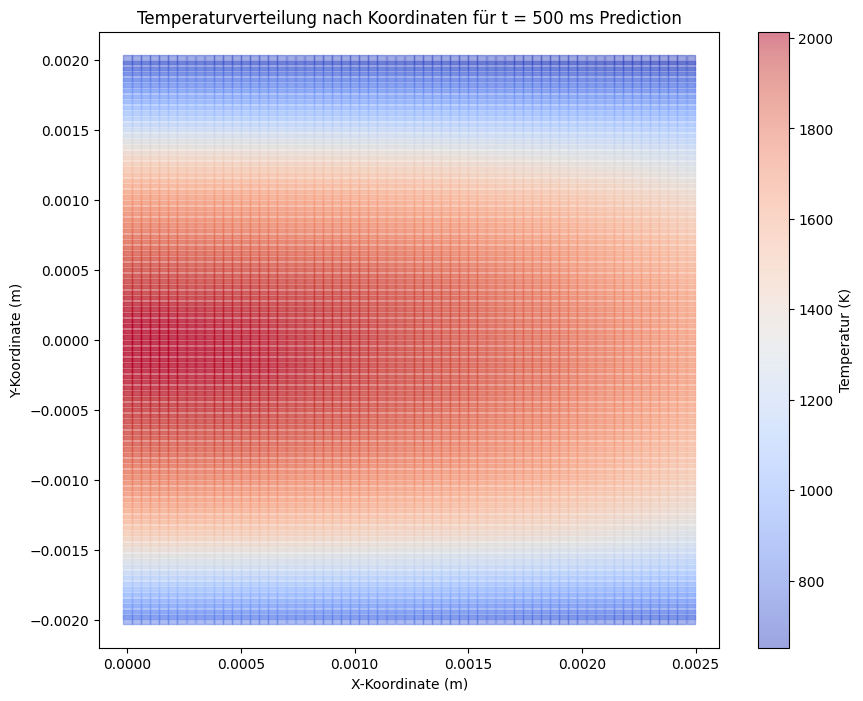

In [42]:


x = df['X-Koordinate']
y = df['Y-Koordinate']  # Y-Koordinaten
temperature = df['Vorhergesagt']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', alpha=0.5, s=40, marker='s')  # 's' für Quadrate
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate (m)')
plt.ylabel('Y-Koordinate (m)')
plt.title('Temperaturverteilung nach Koordinaten für t = 500 ms Prediction')
plt.grid(False)  # Gitterlinien ausblenden
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/D3_I7000_F6000_Prediction.png')
plt.show()


In [3]:
gefilterte_werte = df[(df['X-Koordinate'] >= 0.0015)]
df_werte = gefilterte_werte
print(gefilterte_werte)


NameError: name 'df' is not defined

In [20]:
df_werte = gefilterte_werte[(gefilterte_werte['Y-Koordinate'] >= 0.0015) & (gefilterte_werte['Y-Koordinate'] <= 0.002)]
print(df_werte)

       X-Koordinate  Y-Koordinate  Temperatur
15250        0.0015       0.00150      875.49
15251        0.0015       0.00152      862.47
15252        0.0015       0.00154      849.37
15253        0.0015       0.00156      836.06
15254        0.0015       0.00158      822.54
...             ...           ...         ...
25321        0.0025       0.00192      584.84
25322        0.0025       0.00194      581.64
25323        0.0025       0.00196      578.47
25324        0.0025       0.00198      575.32
25325        0.0025       0.00200      572.20

[1326 rows x 3 columns]


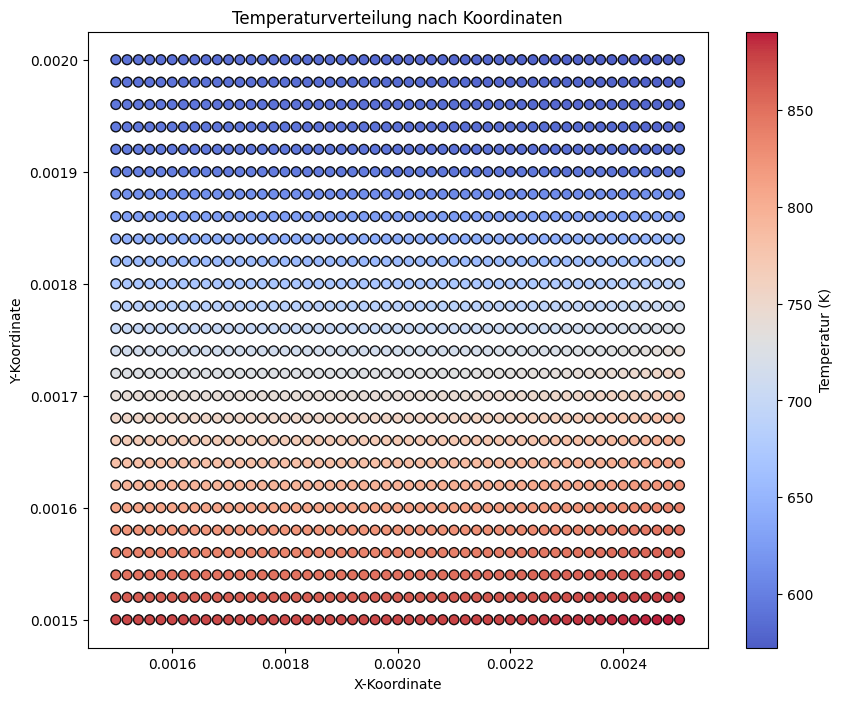

In [21]:
x = df_werte['X-Koordinate']
y = df_werte['Y-Koordinate']  # Y-Koordinaten
temperature = df_werte['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.9, s= 50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [18]:
df_werte1 = df_werte[df_werte['Y-Koordinate']> 0.0018]
print(df_werte[df_werte['Y-Koordinate'] == 0.0018])

       X-Koordinate  Y-Koordinate  Temperatur
25315        0.0025        0.0018      691.47


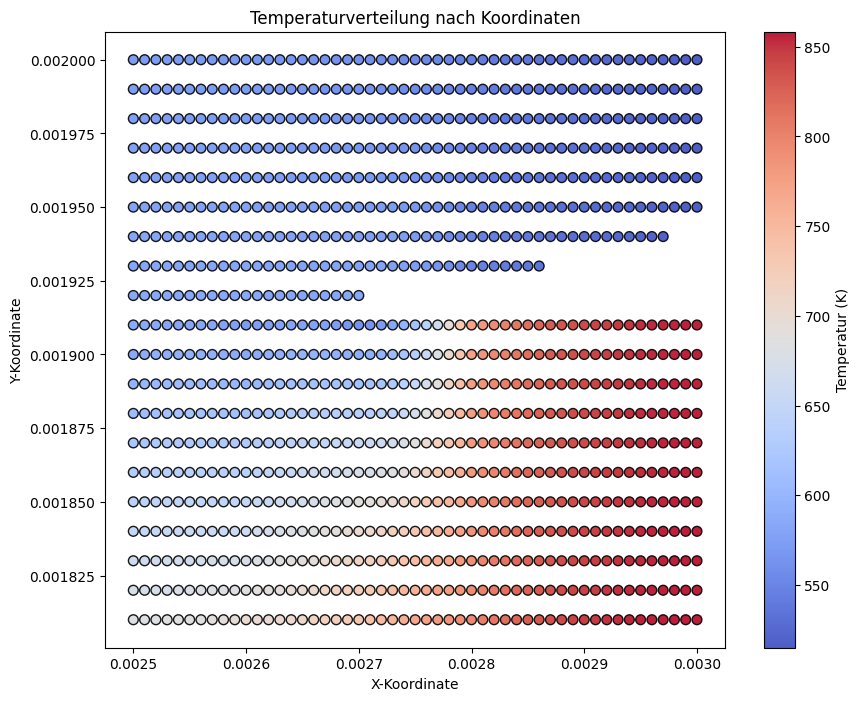

In [9]:
x = df_werte1['X-Koordinate']
y = df_werte1['Y-Koordinate']  # Y-Koordinaten
temperature = df_werte1['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.9, s= 50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [89]:
a1 = df_werte1[df_werte1['Y-Koordinate'] == 0.00200]
print(df_werte1[df_werte1['Y-Koordinate'] == 0.00200])

      X-Koordinate  Y-Koordinate  Temperatur
6463       0.00252         0.002      363.04
6564       0.00256         0.002      360.16
6665       0.00260         0.002      357.59
6766       0.00264         0.002      355.28
6867       0.00268         0.002      353.18
6967       0.00272         0.002      351.28
7067       0.00276         0.002      349.54
7167       0.00280         0.002      347.94
7267       0.00284         0.002      346.48
7367       0.00288         0.002      345.13
7467       0.00292         0.002      343.89
7567       0.00296         0.002      342.75
7667       0.00300         0.002      341.71


In [90]:
a2 = df_werte1[df_werte1['Y-Koordinate'] == 0.00196]
print(df_werte1[df_werte1['Y-Koordinate'] == 0.00196])


      X-Koordinate  Y-Koordinate  Temperatur
6462       0.00252       0.00196      364.22
6563       0.00256       0.00196      360.99
6664       0.00260       0.00196      358.23
6765       0.00264       0.00196      355.78
6866       0.00268       0.00196      353.58
6966       0.00272       0.00196      351.61
7066       0.00276       0.00196      349.82
7166       0.00280       0.00196      348.19
7266       0.00284       0.00196      346.69
7366       0.00288       0.00196      345.32
7466       0.00292       0.00196      344.09
7566       0.00296       0.00196      342.97
7666       0.00300       0.00196      341.96


In [91]:
a = a1['Temperatur'].iloc[0] - a2['Temperatur'].iloc[0]
print(a)


-1.1800000000000068


Test für Git

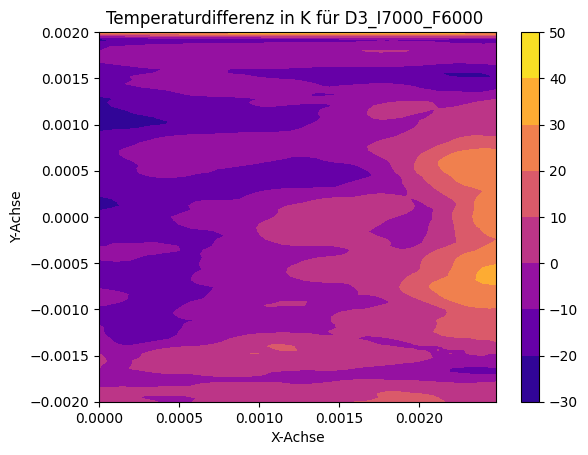

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Daten aus dem DataFrame extrahieren
x = data['X-Koordinate'].values  # Werte für die X-Achse
y = data['Y-Koordinate'].values  # Werte für die Y-Achse
z = data['Differenz'].values  # Z-Werte als Funktion von x und y

# Reshape der Daten für den Surface Plot
x = x.reshape((len(np.unique(x)), len(np.unique(y))))
y = y.reshape((len(np.unique(x)), len(np.unique(y))))
z = z.reshape((len(np.unique(x)), len(np.unique(y))))
# Erstellen des Contour Plots
plt.figure()
contour = plt.contourf(x, y, z, cmap='plasma')

# Beschriftungen und Titel hinzufügen
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.title('Temperaturdifferenz in K für D3_I7000_F6000 ')

# Farbleiste hinzufügen
plt.colorbar(contour)
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/Temperaturdifferenz_D3_I7000_F6000.png')
# Anzeigen des Contour Plots
plt.show()


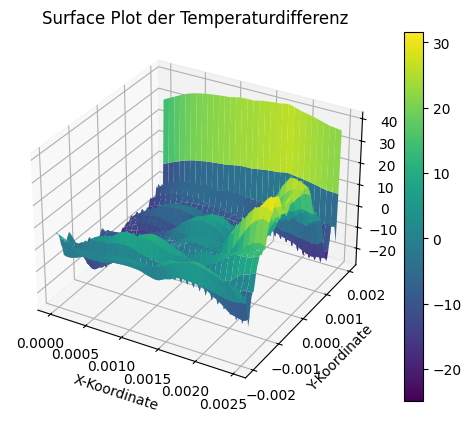

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v

# Erstellen des Surface Plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Beschriftungen und Titel hinzufügen
ax.set_xlabel('X-Koordinate')
ax.set_ylabel('Y-Koordinate')
ax.set_zlabel('Differenz')
ax.set_title('Surface Plot der Temperaturdifferenz in K')

# Farbleiste hinzufügen
fig.colorbar(surf)

# Anzeigen des Surface Plots
plt.show()
